Data set that is used is Boston house-price data which can be found at: http://lib.stat.cmu.edu/datasets/boston

Plotting function "force_plot" gives us a linear graph that shows how much each feature affects the output value. The blue features makes the output value lower, red features makes the output value higher. The numbers under the lines are the feature values corresponding to our current training example. The longer a feature is, more significant impact it has.

It doesn't mean that when a significant pusher of one side removed, model will go high or low for certain. Both cases can happend, and to illustrate this another graph is drawn. LSTAT is removed, and output value got even higher.

Every following two linear graphs are grouped together. First set shows for the first training example, second set shows for the second training example. First graph in every set is with LSTAT feature, second graph is without LSTAT feature.

In [338]:
import xgboost
import shap

shap.initjs()

X,y = shap.datasets.boston()

model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 800)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [341]:
#X=X[[8, 6, 7, 4, 5, 12], :]
Xt=X.iloc[:,[0,1,2,3, 4, 5, 6,7,8,9,10,11]]
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(Xt, label=y), 800)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(Xt)

# From blue part, RM, NOX, RAD etc. are removed. From red part PTRATIO is removed. Output value is overall decreased because 
shap.force_plot(explainer.expected_value, shap_values[0,:], Xt.iloc[0,:])

In [315]:
shap.force_plot(explainer.expected_value, shap_values[1,:], X.iloc[1,:])

In [327]:
shap.force_plot(explainer.expected_value, shap_values[1,:], Xt.iloc[1,:])

Following two graphs are versions that are extended to all training set of previous graphs. First one is with LSTAT, second one is without. Here we can observe significance of all features to the output. From the right panel a specific feature can be selected either. Graphs are ordered by similartiy but it can be adjusted. It can be observed that as blue features gets more dense, output value becomes lower than base value which is 22.52 in this case(can be found at previous graphs).

In [316]:
shap.force_plot(explainer.expected_value, shap_values, X)

In [329]:
shap.force_plot(explainer.expected_value, shap_values, Xt)

Last type of graph is "summary_plot". It queues all features by their importance. We can observe that most impact done by LSTAT. Did it do more positive or negative impact? I'm not sure about that and it shouldn't be told just by looking at this graph. Because even though it has high absolute values at some places, it has smaller absolute reverse values at some other places with more density. But it is clear that LSTAT has the most value.

When we observe the second graph, the graph when we eliminated LSTAT we can observe NOX gained greater importance and started to push output higher than the base value. Just as we observed at the previous graphs.

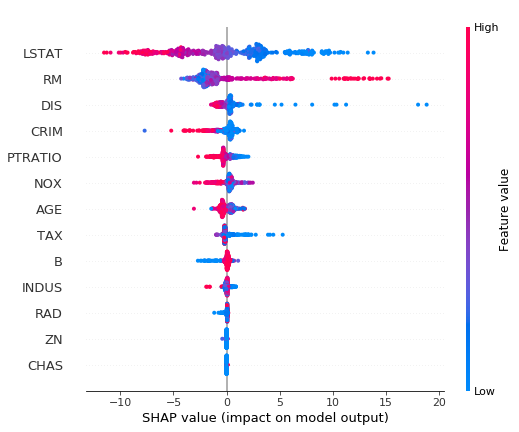

In [339]:
shap.summary_plot(shap_values, X)

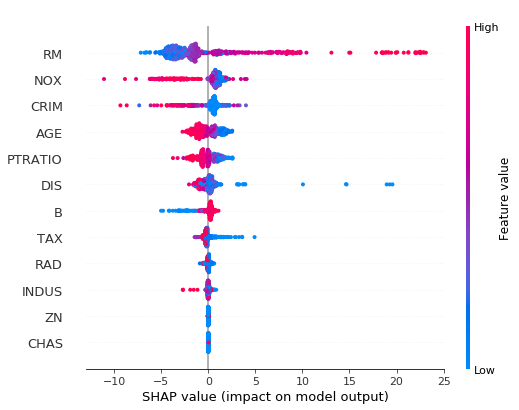

In [342]:
shap.summary_plot(shap_values, Xt)

To observe characteristic of an insignificant feature another test is done. A random vector is added to dataset as a feature. We can observe it didn't affect the output of the first training example much, and when we look at the graph for all data set we can see it displays same characteristic every time.

In [283]:
V=np.random.random(506)
V=V.reshape(506,1)
V=V*1000
X=np.concatenate((X, V), axis=1)

model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 800)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
print(shap_values[0,:].shape)
shap.force_plot(explainer.expected_value, shap_values[0,:], X[0,:])

(14,)


In [284]:
shap.force_plot(explainer.expected_value, shap_values, X)